In [1]:
import xgboost as xgb
from sklearn import datasets
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

from utils_xgb import find_all_split_path, find_class

C:\Users\dcdmm\anaconda3\envs\pytorch_env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
enc = OrdinalEncoder()

X = datasets.fetch_covtype().data[:1000]
y = enc.fit_transform(datasets.fetch_covtype().target[:1000].reshape(-1, 1))
dtrain = xgb.DMatrix(data=X, label=y)

model = xgb.train(params={"max_depth": 2, 'num_class': 7, 'objective': 'multi:softmax'}, dtrain=dtrain)

[15:22:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [3]:
df = model.trees_to_dataframe()
df_0 = df[df['Tree'] == 0]
df_0

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover,Category
0,0,0,0-0,f0,3019.5,0-1,0-2,0-1,173.102737,244.897980,NaN
1,0,1,0-1,f0,2793.5,0-3,0-4,0-3,16.369188,201.306137,NaN
2,0,2,0-2,f5,5103.5,0-5,0-6,0-5,36.088760,43.591839,NaN
3,0,3,0-3,Leaf,NaN,NaN,NaN,NaN,-0.116806,84.489800,NaN
4,0,4,0-4,Leaf,NaN,NaN,NaN,NaN,0.055656,116.816338,NaN
5,0,5,0-5,Leaf,NaN,NaN,NaN,NaN,0.819853,29.632656,NaN
6,0,6,0-6,Leaf,NaN,NaN,NaN,NaN,0.217735,13.959185,NaN


In [4]:
result = find_all_split_path(df_0)
result

[[[{'Feature': 'f0'},
   {'Less_than': 'Yes'},
   {'Split': 3019.5},
   {'Gain': 173.102737}],
  [{'Feature': 'f0'},
   {'Less_than': 'Yes'},
   {'Split': 2793.5},
   {'Gain': 16.3691883}],
  {'Gain': -0.116805926}],
 [[{'Feature': 'f0'},
   {'Less_than': 'Yes'},
   {'Split': 3019.5},
   {'Gain': 173.102737}],
  [{'Feature': 'f0'},
   {'Less_than': 'No'},
   {'Split': 2793.5},
   {'Gain': 16.3691883}],
  {'Gain': 0.0556556322}],
 [[{'Feature': 'f0'},
   {'Less_than': 'No'},
   {'Split': 3019.5},
   {'Gain': 173.102737}],
  [{'Feature': 'f5'},
   {'Less_than': 'Yes'},
   {'Split': 5103.5},
   {'Gain': 36.0887604}],
  {'Gain': 0.819853425}],
 [[{'Feature': 'f0'},
   {'Less_than': 'No'},
   {'Split': 3019.5},
   {'Gain': 173.102737}],
  [{'Feature': 'f5'},
   {'Less_than': 'No'},
   {'Split': 5103.5},
   {'Gain': 36.0887604}],
  {'Gain': 0.217735335}]]

In [5]:
result[-1]

[[{'Feature': 'f0'},
  {'Less_than': 'No'},
  {'Split': 3019.5},
  {'Gain': 173.102737}],
 [{'Feature': 'f5'},
  {'Less_than': 'No'},
  {'Split': 5103.5},
  {'Gain': 36.0887604}],
 {'Gain': 0.217735335}]

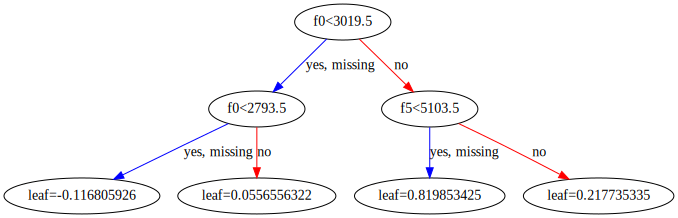

In [6]:
xgb.to_graphviz(model)

In [7]:
data = np.concatenate((X, y), axis=1)

distribution, split_class = find_class(data, result)
print(distribution)
print(split_class)

[{2.0: 124, 1.0: 205, 0.0: 16}, {1.0: 322, 0.0: 90, 2.0: 65}, {0.0: 101, 1.0: 20}, {1.0: 38, 0.0: 19}]
[1.0, 1.0, 0.0, 1.0]
